In [29]:
import pandas as pd

In [30]:
dados_amazon = pd.read_csv('amazon/output/dados_amazon.csv')
dados_amazon.sample(5)

,Descrição,Preço,Estrelas,TotalReviews,Url,Loja,Categoria
465,Celular Smartphone Xiaomi Redmi Note 9 64gb 3g...,1335.00,4.2,238.0,https://www.amazon.com.br/Celular-Smartphone-X...,Amazon,Smartphone
184,"CERISIAANN Mesa de laptop para cama, suporte d...",3335.36,0.0,0.0,https://www.amazon.com.br/CERISIAANN-relaxamen...,Amazon,Notebook
237,"Notebook Lenovo ThinkPad E14 i5 - 10210U, 8GB ...",9971.85,4.8,9.0,https://www.amazon.com.br/Notebook-Lenovo-Thin...,Amazon,Notebook
443,Smartphone Samsung Galaxy A01 Core 32GB Tela 5...,759.00,4.0,50.0,https://www.amazon.com.br/Smartphone-Samsung-G...,Amazon,Smartphone
280,Smartphone Xiaomi Redmi Note 8 4GB Ram Tela 6....,1249.90,4.7,3905.0,https://www.amazon.com.br/Smartphone-Xiaomi-Re...,Amazon,Smartphone


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Preço', ylabel='Count'>

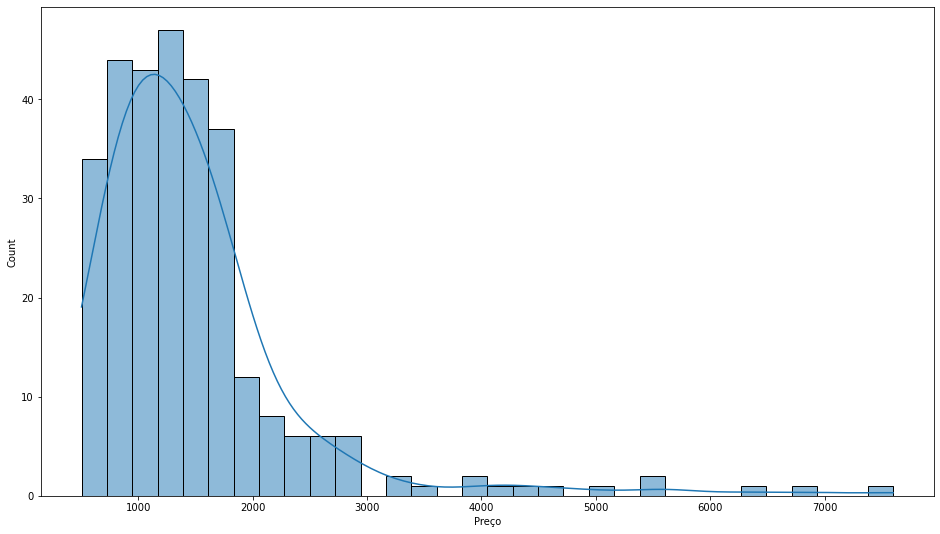

In [32]:
fig = plt.figure(figsize=(16,9))
sns.histplot(x='Preço', data=dados_amazon[dados_amazon['Categoria'] == 'Smartphone'], kde=True)

In [33]:
dados_amazon.groupby('Categoria')[['Preço','Categoria']].mean()

,Preço
Categoria,
Geladeira,4190.281210
Notebook,4468.761873
Smartphone,1493.516254
TV,2623.229494


<AxesSubplot:xlabel='Categoria', ylabel='Preço'>

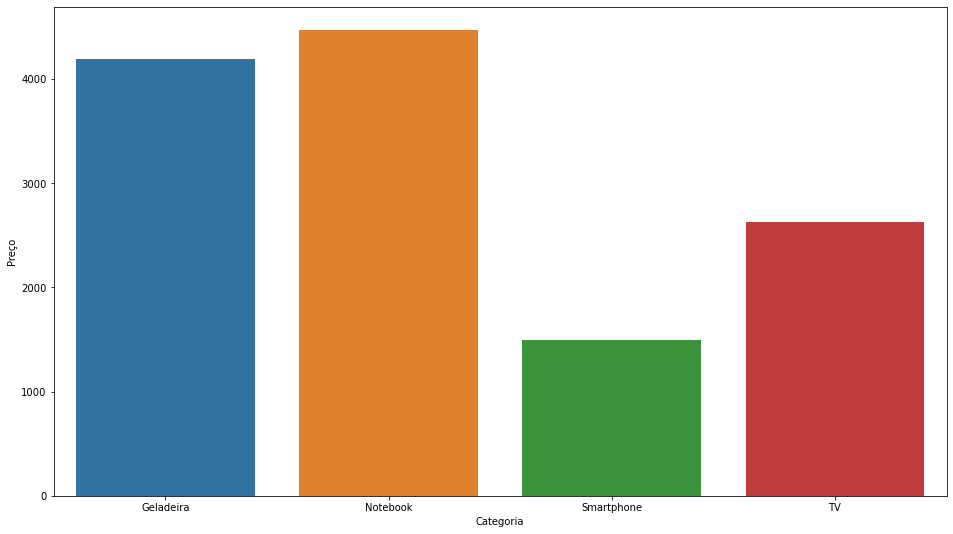

In [34]:
fig = plt.figure(figsize=(16,9))
sns.barplot(x=dados_amazon.groupby('Categoria')[['Preço','Categoria']].mean().index,y='Preço', data=dados_amazon.groupby('Categoria')[['Preço','Categoria']].mean())

<AxesSubplot:xlabel='Categoria', ylabel='Preço'>

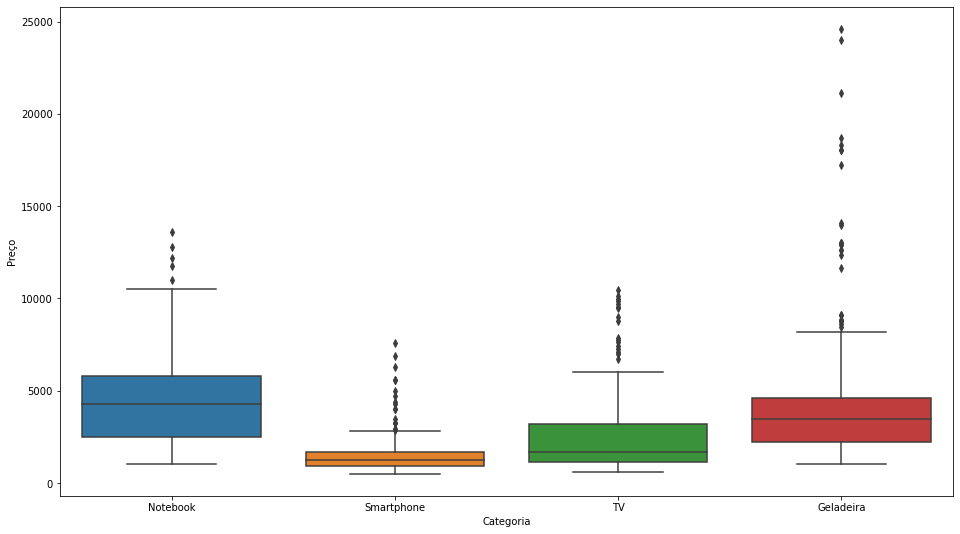

In [28]:
fig = plt.figure(figsize=(16,9))
sns.boxplot(x='Categoria', y='Preço', data=dados_amazon)